# Chapter 2: The Vector

A vector is a function with finite domain, and python's dictionaries are a good way to represent them. Consider $R^{WORDS}$, i.e. the set of all WORDS vectors over $R$. If we were to represent the vector as a python dictionary, we would have a lot of keys, perhaps some that our problem domain doesn't need to use. For this we may adopt a convention called **sparse representation**, where we skip the key-value pairs whose values are 0.

A vector most of whose values are zero is called a sparse vector. If no more than k of the entries are nonzero, we say the vector is k-sparse. A k-sparse vector can be represented using space proportional to k.

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def unzip(LofL):
    return [[v[0] for v in LofL], [v[1] for v in LofL]]

In [3]:
def plot(L, *args, **kwargs):
    plt.ylim(-4, 4)
    plt.xlim(-4, 4)
    plt.axhline(0, color='gray', linewidth=1)
    plt.axvline(0, color='gray', linewidth=1)
    plt.plot(*unzip(L), marker='o', color='red', linestyle='None', markersize=2.5)

**Task 2.3.2**: In this task, we will represent a vector using a Python list. In Python, assign to the variable L a list of 2-element lists:

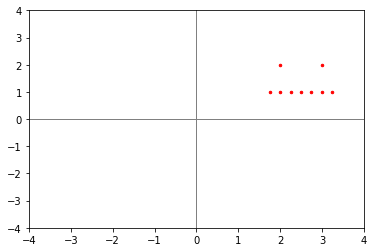

In [4]:
L = [[2, 2], [3, 2], [1.75, 1], [2, 1], [2.25, 1], [2.5, 1], [2.75, 1], [3, 1], [3.25, 1]]
plot(L, 4)

In [5]:
def add2(v,w):
    return [v[0]+w[0], v[1]+w[1]]

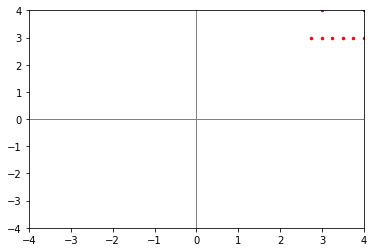

In [6]:
plot([add2(v, [1,2]) for v in L], 4)

In [7]:
def addn(v, w):
    return [sum(x) for x in zip(v,w)]

In [8]:
addn([1, 2, 3], [4, 5, 6])

[5, 7, 9]

## Scalar Vector Multiplication
Multiplying a vector $v$ by a scalar $\alpha$ is defined as multiplying each entry of $v$ by $\alpha$

**Quiz 2.5.3**: Suppose we represent n-vectors by n-element lists. Write a procedure scalar_vector_mult(alpha, v) that multiplies the vector v by the scalar alpha.

In [9]:
def scalar_vector_mult(alpha, v):
    return [alpha * n for n in v]

**Task 2.5.4**: Plot the result of scaling the vectors in L by 0.5, then plot the result of scaling them by -0.5.

In [10]:
L_scaled_by_0_5 = [scalar_vector_mult(0.5, v) for v in L]
L_scaled_by_minus_0_5 = [scalar_vector_mult(-0.5, v) for v in L]

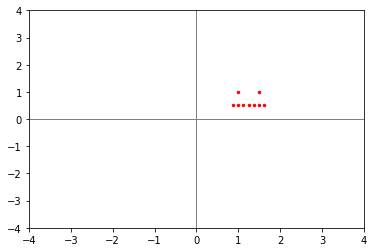

In [11]:
plot(L_scaled_by_0_5)

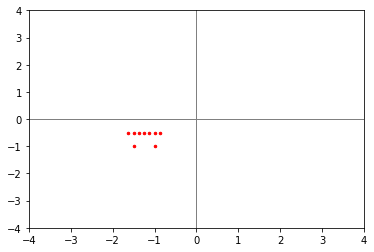

In [12]:
plot(L_scaled_by_minus_0_5)

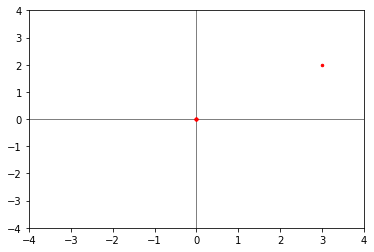

In [13]:
v = [3, 2]
plot([scalar_vector_mult(i/10, v) for i in range(11)], 5)

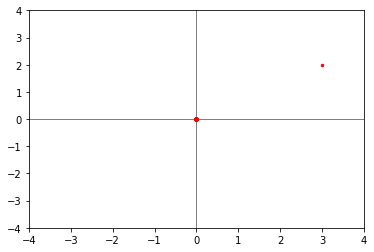

In [14]:
plot([scalar_vector_mult(i/100, v) for i in range(101)], 5)

## 2.6: Combining vector addition and scalar multiplication

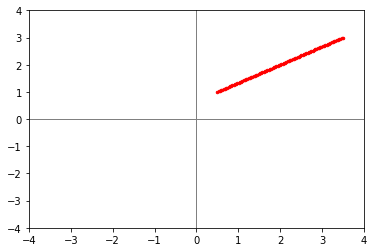

In [15]:
plot([add2(scalar_vector_mult(i/100., [3,2]), [0.5,1]) for i in range(101)], 4)

**Exericse 2.6.1** Given points u = [2,3] and v = [5,7] in R2, what is the point w such that the origin-to-w line segment can be translated to yield the u-to-v line segment? And what is the translation vector that is applied to both endpoints?

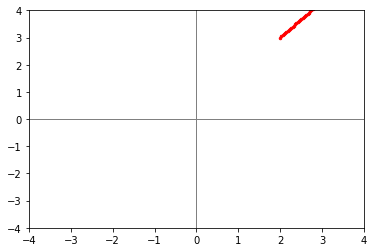

In [16]:
u = [2, 3]
v = [5, 7]
w = add2(v, scalar_vector_mult(-1, u))
transl = u
plot([add2(transl, scalar_vector_mult(i/100., w)) for i in range(101)])

**Exercise 2.6.2**: Given a pair of points, u = [1,4], v = [6,3] in R2, write a mathematical expressing giving the set of points making up the line segment between the points.

Answer:

$\{u + \alpha(v - u), \alpha \in R, 0 \leq \alpha \leq 1\}$

An expression of the form αu+βv where α,β ≥ 0 and α+β = 1 is called a convex combination of u and v. Which leads us to
the fact that the u-to-v line segment consists of the set of convex combinations of u and v.

**Task 2.6.9**: Write a python procedure segment(pt1, pt2) that, given points represented as 2-element lists, returns a list of a hundred points spaced evenly along the line segment whose endpoints are the two points
Plot the hundred points resulting when pt1 = [3.5, 3] and pt2 = [0.5, 1]

In [17]:
def segment(pt1, pt2):
    return [add2(scalar_vector_mult(i/100, pt1), scalar_vector_mult(1-(i/100), pt2)) for i in range(101)]

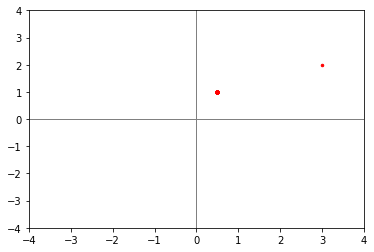

In [18]:
plot(segment([3,2], [0.5, 1]))

The difference between convex and affine combinations it that, in a convex combination, the coefficients $\alpha$, $\beta$, ... have to be positive. In affine combinations there is no such restrition. In the 2D case, a convex combination between the points is a line segment, but the affine combination is a line through both points, as a coefficient can exceed the 1 bound and be i.e. 3, because there will be

At this point the book introduces a class **Vec** that will represent the domain of a function as a set and the function itself as a dictionary.

In [19]:
class Vec:
    def __init__(self, labels, function):
        self.D = labels
        self.f = function

In [20]:
v = Vec({'A','B','C'}, {'A':1})

**Quiz 2.7.1**: Write a procedure zero_vec(D) with the following spec:

- input: a set D
- output: an instance of Vec representing a D-vector all of whose entries have value zero

In [21]:
def zero_vec(D):
    return Vec(D, {})

In [22]:
def setitem(v, d, val): v.f[d] = val

In [23]:
setitem(v, 'B', 2.)

**Quiz 2.7.2**: Write a procedure getitem(v, d) with the following spec: 

- input: an instance v of Vec, and an element d of the set v.D
- output: the value of entry d of v

Write your procedure in a way that takes into account the sparse-representation convention. Hint: the procedure can be written in one-line using a conditional expression (Section 0.5.3). You can use your procedure to obtain the 'A' entry of the vector v we defined earlier:

getitem(v, 'A')
1

In [24]:
def getitem(v, d):
    return v.f.get(d, 0)

In [25]:
getitem(v, 'A')

1

In [26]:
getitem(v, 'Z')

0

**Quiz 2.7.3**: Write a procedure scalar_mul(v, alpha) with the following spec:

- input: an instance of Vec and a scalar alpha
- output: a new instance of Vec that represents the scalar-vector product alpha times v.
    
There is a nice way to ensure that the output vector is as sparse as the input vector, but you are not required to ensure this. You can use getitem(v, d) in your procedure but are not required to. Be careful to ensure that your procedure does not modify the vector it is passed as argument; it creates a new instance of Vec. However, the new instance should point to the same set D as the old instance.

In [27]:
def scalar_mul(v, alpha):
    return Vec(v.D, {d: value*alpha for d,value in v.f.items()})

In [28]:
scalar_mul(v, 2).f

{'A': 2, 'B': 4.0}

**Quiz 2.7.4**: Write a procedure add(u, v) with the following spec: 

- input: instances u and v of Vec
- output: an instance of Vec that is the vector sum of u and v

Here’s an example of the procedure being used:
u = Vec(v.D, {'A':5., 'C':10.})
add(u,v)
<__main__.Vec object at 0x10058cd10>
add(u,v).f
{'A': 6.0, 'C': 10.0, 'B': 2.0}
You are encouraged to use getitem(v, d) in order to tolerate sparse representations. You are encouraged not to try to make the output vector sparse. Finally, you are encouraged to use a dictionary comprehension to define the dictionary for the new instance of Vec.

In [29]:
def add(u, v):
    return Vec(u.D | v.D, { d: getitem(u, d) + getitem(v, d) for d in u.D | v.D})

In [30]:
u = Vec(v.D, {'A': 5., 'C': 10.})

In [31]:
add(u, v).f

{'A': 6.0, 'B': 2.0, 'C': 10.0}

**Quiz 2.7.5**: Write a Python procedure neg(v) with the following spec: 

- input: an instance v of Vec
- output: a dictionary representing the negative of v

Here’s an example of the procedure being used:
neg(v).f
{'A': -1.0, 'C': 0, 'B': -2.0}
There are two ways to write the procedure. One is by explicitly computing the .f field of the output vector using a comprehension. The other way is by using an appropriate call to the procedure scalar_mul you defined in Quiz 2.7.3.

In [32]:
def neg(v):
    return scalar_mul(v, -1)

In [33]:
neg(v).f

{'A': -1, 'B': -2.0}

**Quiz 2.9.4**: Write a procedure list_dot(u, v) with the following spec: 

- input: equal-length lists u and v of field elements
- output: the dot-product of u and v interpreted as vectors

Use the sum(·) procedure together with a list comprehension.

In [34]:
def list_dot(u, v):
    return sum([a*b for a, b in zip(u, v)])

**Quiz 2.9.13**: Suppose the haystack is [1, -1, 1, 1, 1, -1, 1, 1, 1] and the needle is [1, -1, 1, 1, -1, 1]. Compute the dot-products and indicate which position achieves the best match.

In [35]:
haystack = [1, -1, 1, 1, 1, -1, 1, 1, 1]
needle =   [1, -1, 1, 1, -1, 1]
[list_dot(haystack[n:n+len(needle)], needle) for n in range(len(haystack) - len(needle) + 1)]

[2, 2, 0, 0]

**Quiz 2.9.14**: This method of searching is not universally applicable. Say we wanted to locate the short clip [1, 2, 3] in the longer segment [1, 2, 3, 4, 5, 6]. What would the dot-product method select as the best match?

Answer: It would select [4, 5, 6] as the best match

**Quiz 2.9.15**: Write a procedure dot_product_list(needle,haystack) with the following spec:

- input: a short list needle and a long list haystack, both containing numbers
- output: a list of length len(haystack)-len(needle) such that entry i of the output list equals the dot-product of the needle with the equal-length sublist of haystack starting at position i

In [36]:
def dot_product_list(needle, haystack):
    return [list_dot(haystack[n:n+len(needle)], needle) for n in range(len(haystack) - len(needle) + 1)]

In [37]:
dot_product_list([1, -1, 1, 1, -1, 1], [1, -1, 1, 1, 1, -1, 1, 1, 1])

[2, 2, 0, 0]

**Problem 2.9.29**: Eve knows the following challenges and responses:
challenge response

- 110011 0 
- 101010 0 
- 111011 1 
- 001100 1

Show how she can derive the right responses to the challenges 011101 and 000100.

In [64]:
def addl(u, v):
    return [a+b for a,b in zip(u, v)]

In [65]:
def add_n(veclist):
    if len(veclist) == 1:
        return veclist[0]
    elif len(veclist) == 2:
        return addl(veclist[0], veclist[1])
    elif len(veclist) > 2:
        return addl(addl(veclist[0], veclist[1]), add_n(veclist[2:]))
        

In [68]:
a = [1, 1, 0, 0, 1, 1]
b = [1, 0, 1, 0, 1, 0]
c = [1, 1, 1, 0, 1, 1]
d = [0, 0, 1, 1, 0, 0]
target1 = [0, 1, 1, 1, 0, 1]
target2 = [0, 0, 0, 1, 0, 0]

possible_sums = [[a, b, c, d], [a, b, c], [a, b, d], [b, c, d], [a, b], [a, c], [a, d], [b, c], [b, d], [c, d]]

for vec_sum_elems in possible_sums:
    vec_sum = add_n(vec_sum_elems)
    if vec_sum == target2:
        print(vec_sum_elems)
        break

**Quiz 2.10.1**: Write a procedure list2vec(L) with the following spec:

- input: a list L of field elements
- output: an instance v of Vec with domain {0, 1, 2, . . . , len(L) − 1} such that v[i] = L[i] for each integer i in the domain

In [69]:
def list2vec(L):
    len_L = len(L)
    return Vec([range(len_L)], { i:L[i] for i in range(len_L)})

**Quiz 2.11.2**: Using the above technique, solve the following system by hand:

- 2x1 + 3x2 − 4x3 = 10
-       1x2 + 2x3 = 3
-             5x3 = 15

Answer:

- x3 = 15/5 = 3
- x2 = 3 - 2(3) = 3 - 6 = -3
- x1 = (10 - 3(-3) + 4(3))/2 = 31/2

**Exercise 2.11.3**: Solve the following system:

\begin{align}
1x_1 − 3x_2 − 2x_3 &= 7 \\
2x_2 + 4x_3 &= 4 \\
−10x_3 &= 12 \\
\end{align}

Answer:

\begin{align}
x_3 = \frac{12}{-10} = \frac{-6}{5} \\
x_2 = \frac{4 - 4\frac{-6}{5}}{2} = \frac{4 + \frac{24}{5}}{2} = \frac{22}{5} \\
x_1 = 7 - 2 \frac{-6}{5} - 3 \frac{22}{5} = \frac{89}{5}
\end{align}


Write a procedure triangular_solve_n(rowlist, b) with the following spec:

- input: for some integer n, a triangular system consisting of a list rowlist of n-vectors, and a length-n list b of numbers
- output: a vector xˆ such that, for i = 0, 1, . . . , n − 1, the dot-product of rowlist[i] with xˆ equals b[i]


In [76]:
from vecutil import vec

ImportError: No module named vec

In [77]:
def triangular_solve_n(rowlist, b):
    D = rowlist[0].D
    n = len(D)
    assert D == set(range(n))
    x = zero_vec(D)
    for i in reversed(range(n)):
        x[i] = (b[i] - rowlist[i] * x)/rowlist[i][i]
    return x

In [72]:
triangular_solve_n([list2vec([1, -3, -2]), list2vec([0, 2, 4]), list2vec([0, 0, -10])], [7, 4, 12])

AssertionError: 